<a href="https://colab.research.google.com/github/RDGopal/IB9CW0-Text-Analytics/blob/main/Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries
In this first session, we will explore some simple text processing of the `babynames` dataset, which contains information on the popularity of baby names in the US from 1880 to 2018.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
babynames = pd.read_csv('babynames.csv')

One simple thing we can do with text is to measure its length. For example, we can create a new column that contains the number of characters in each baby name.

In [ ]:
babynames['namelength'] = babynames['name'].str.len()
print(babynames.head())

   year sex       name     n      prop  namelength
0  1880   F       Mary  7065  0.072384           4
1  1880   F       Anna  2604  0.026679           4
2  1880   F       Emma  2003  0.020521           4
3  1880   F  Elizabeth  1939  0.019866           9
4  1880   F     Minnie  1746  0.017888           6


Another thing we can do with data is to visualize it using plots. For example, we can create a plot that shows how the mean name length has changed over time for males and females. We will use `seaborn`, which is built on top of `matplotlib` and integrates well with `pandas` data frames:

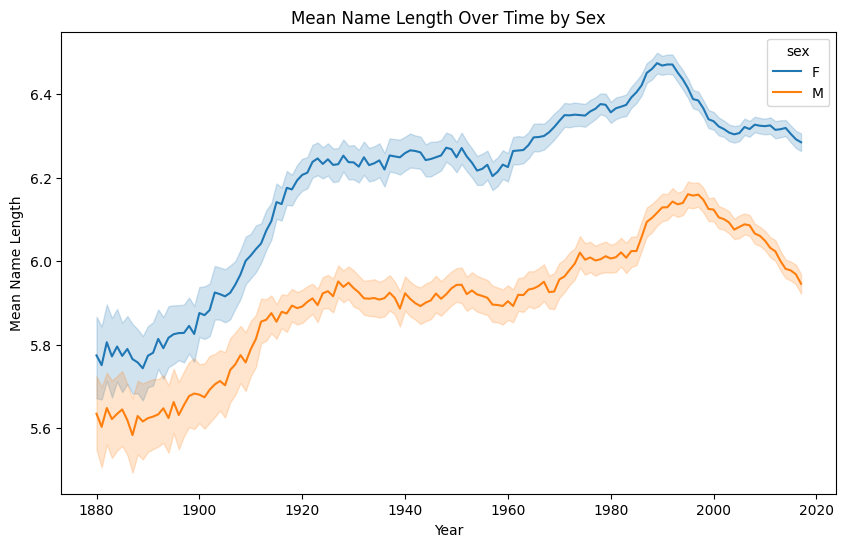

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=babynames, x='year', y='namelength', hue='sex')
plt.xlabel('Year')
plt.ylabel('Mean Name Length')
plt.title('Mean Name Length Over Time by Sex')
plt.show()


# Your Turn
1.	Plot the total number of babies born each year, broken down by gender.
2.	Create a plot with year on the-axis and the most popular female name on the Y-axis.


# Regular Expression
 A Regular Expression, or RegEx, is a sequence of
characters that specifies a pattern to be searched.
* RegEx is like a mini "programming language" that embedded in
Python, as well as other languages (more or less).
* For example,
```
# \b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[AZ]{2,}\b
```
 is a regular expression to match valid email addresses.
* Very useful for data collection, extraction and cleaning.
* But requires practice and "trial and error".

## Sets []
[] is used to match a single character specified in the brackets..
* [abcd]: Matches either a, b, c or d. It does not match "abcd".
* [a-d]: Matches any one alphabet from a to d.
* [a-] and [-a] | Matches a or -, because - is not being used to indicate a
series of characters.
* [a-z0-9] | Matches any character from a to z and also from 0 to 9.

[^] is used to match a single character not specified in the brackets
* [^abc] matches any character that is not a, b and c.

## RegEx in Python
Python has build-in module re for regular expression operation.
* `re.findall(A, B)` will matches all instances of a string or an expression A in a string B and returns them in a list.

`print(re.findall("o","I love python"))` # ['o','o']

* Add r before string A to indicate a regular expression.

`print(re.findall(r"[a-p]","I love python"))` # ['l', 'o', 'e', 'p', 'h', 'o', 'n']

`print(re.findall(r"[Iop]","I love python"))` # ['I', 'o', 'p', 'o']

`print(re.findall(r"[o-t][v-z]","I love python"))` # ['ov', 'py']

## Special Sequences
`\w` Matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also
matches the ideogram and underscore, _.

`print(re.findall(r"\w","I love爱 python3"))` # ['I', 'l', 'o', 'v', 'e', '爱', 'p', 'y', 't', 'h', 'o',
'n', '3']

`\W` matches any character not included in `\w`.

`\d` Matches digits, which means 0-9.

`print(re.findall(r"\d","I love python3"))` # ['3']
`print(re.findall(r"\w\d","I love python3"))` #['n3']
`\D` Matches any non-digits.

`print(re.findall(r"\D","I love python3"))` # ['I', ' ', 'l', 'o', 'v', 'e', ' ', 'p', 'y', 't', 'h', 'o',
'n']

## Regular Expression Quantifiers
`*` 0 or more

`+` 1 or more

`?` 0 or 1

`{2}` Exactly 2

`{2,5}` Between 2 and 5

`{2,}` 2 or more

`(,5}` Up to 5

• Find all WBS student ids in a text, such as u1888888.

`re.findall(r'u1\d{6}')`

## Special Characters
`\s` | Matches whitespace characters, which include the \t (tab space),
`\n` (new line), \r (return), and space characters.

`\S` | Matches non-whitespace characters.
`print(re.findall(r"\S","I love python3."))` # ['I', 'l', 'o', 'v', 'e', 'p', 'y', 't', 'h',
'o', 'n', '3', '.']

`\b` | matches the empty string (zero-width character, not blank space)
at the beginning or end, i.e. boundary of a word (\w), in other words,
between \w and \W.

`\B` | matches the any position that is not a word boundary \b.

`print(re.findall(r"\w\b","I, love."))` #['I', 'e']
`print(re.findall(r"\w\B","I, love."))` # ['l', 'o', 'v']
I, love.

## Special Characters
`^` | matches the starting position of the string.
`print(re.findall(r'^\w','I, love, python'))` # ['I']

`$` | matches the ending position of the string.
`print(re.findall(r'\w$','I, love, python'))` # ['n']

`.` | matches any character except line terminators like \n.

`\` | Escapes special characters or denotes character classes.

`A|B` | Matches expression A or B.

• Extract title and last name from column Name as new columns.

```
df_titan.Name.str.extract('\s(\w+)\.')
df_titan['Title'] = df_titan.Name.str.extract('\s(\w+)\.')
df_titan.Name.str.extract('^(\w+),')# NaN
df_titan.Name.str.extract('^([\w\s]+),') #NaN
df_titan.Name.str.extract('^([\w\s\']+),')
df_titan['LastName'] = df_titan.Name.str.extract('^(\D+),')
```



# Resources

Practice regular espressions: [RegExOne](https://regexone.com/)



# Example

We will work with first 5000 rows from the `Reviews.csv` file.

In [ ]:
df = pd.read_csv('Reviews.csv',nrows=5000)

In [ ]:
df.shape

In [ ]:
df

In [ ]:
# drop data with missing values in the 'Review' column
df = df.dropna(axis=0, subset=['Review'])
df['Review'].head()

1    Originally i bought this in black and white. r...
2    Love this tank. material and fit are great. lo...
3    I love this tank, it is so comfortable but it ...
4    I just adore this top! it is so comfy and styl...
5    I love this sweater. definite classic. i get l...
Name: Review, dtype: object

In [ ]:
# Regex to find positive sentiment words
df['Positive_Sentiments'] = df['Review'].apply(
    lambda x: re.findall(r"\b(love|great|adore|excellent)\b", x, flags=re.IGNORECASE))

In [ ]:
print(df[['Review','Positive_Sentiments']])

In [ ]:
# Regex to find mentioned prices
df['Prices'] = df['Review'].apply(
    lambda x: re.findall(r"\$\d+(\.\d{1,2})?", x))

In [ ]:
df[['Review','Prices']]

In [ ]:
# Count how many reviews have at least one price mentioned
number_of_reviews_with_prices = df['Prices'].apply(lambda x: len(x) > 0).sum()

print(f"Number of reviews mentioning prices: {number_of_reviews_with_prices}")

Number of reviews mentioning prices: 39


# Your Turn
1. Find all mentions of the words 'refund' or 'late delivery'
2. Find all hashtags (they start with #).

# Another Example

In [ ]:
df = pd.read_csv('oct_delta.csv')


In [ ]:
df.columns

In [ ]:
# Regex to find twitter handles
pattern = r"@\w+"
df['handle'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
print(df[['handle']])

In [ ]:
# Regex to capture phone numbers
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
df['phone'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
df[['phone']]

In [ ]:
df_filtered = df[df['phone'].apply(lambda x: x != [])]
df_filtered

,weekday,month,date,year,text,handle,phone
6,Thu,Oct,1,2015,@BigGucciQueen This is your direct dial numbe...,[@BigGucciQueen],[1 360 277 3461]
27,Thu,Oct,1,2015,@i_am_rao You may wish to speak with our Onlin...,[@i_am_rao],[888 750 3284]
40,Thu,Oct,1,2015,@daniellecalder ...at 1-888-750-3284. *BB 2/2,[@daniellecalder],[888-750-3284]
47,Thu,Oct,1,2015,"@mglacey Hi, Mitch. We haven't received any co...",[@mglacey],[888-750-3284]
96,Fri,Oct,2,2015,"@missmelon Hello, Helen. I recommend contactin...",[@missmelon],[800-221-1212]
...,...,...,...,...,...,...,...
1276,Wed,Oct,14,2015,"@matthewtwill Hi Matt, pls reach out to our R...",[@matthewtwill],[800-221-1212]
1347,Thu,Oct,15,2015,"@KerKilbourne ...facilities, contact Standard ...",[@KerKilbourne],[773-686-6148]
1348,Thu,Oct,15,2015,"@KerKilbourne ...security screening locations,...",[@KerKilbourne],"[773-601-1817, 773-686-7532]"
1349,Thu,Oct,15,2015,@KerKilbourne Hi. If the bag was lost In the p...,[@KerKilbourne],"[773-686-2385, 773-377-1210]"


In [ ]:
# Regex to capture web addresses
pattern = r"https?:\/\/(?:www\.)?\S+\.\S+"
df['web'] =df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))

In [ ]:
df_filtered = df[df['web'].apply(lambda x: x != [])]
df_filtered

# Your Turn
Read the `fakenews.csv` file.
1. Find all mentions of Prince Harry.
2. Find all mentions of Prince Harry that is fake news.
3. Find all phonenumbers.

# Testing regex

In [ ]:
text = "Contact numbers are 415-555-1234, (416)555-3456, 202 555 4567, 4035555678, and 1 416 555 9292."
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
matches = re.findall(pattern, text)
print(matches)


['415-555-1234', '(416)555-3456', '202 555 4567', '4035555678', '1 416 555 9292']


In [ ]:
text = """
Visit our site at http://www.example.com for more information.
Alternatively, check our support page at https://support.example-site.com/help.
You can also engage with our community at www.community-forum.org.
"""
pattern = r"https?:\/\/(?:www\.)?\S+\.\S+"
matches = re.findall(pattern, text)

print(matches)


['http://www.example.com', 'https://support.example-site.com/help.']
